# Linear Regression #


### Definition ###

Linear regression is the simplest and most widely used statistical technique for predictive modeling. It basically gives us an equation, where we have our features as independent variables, on which our target variable is dependent upon.

`In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). 
The case of one explanatory variable is called simple linear regression. (source Wikipedia)`<br/>



### What do we use it for? ###

we use it to predict a value given a set of examples. Let say we have the prices of houses and the number of rooms each house has. If we give the system a new house with 5 rooms, the system can predict its price.
This is very simplicistic example just to give an idea.
#### Used to predict numerical values (age, salary, height, price, etc...) ####

### How does it work? ###

We use a mathematical way to create a function that can best predict the new value.

We plot all our data samples on the graph and we try to draw the best line possible

<img src="lr_assets/1200px-Linear_regression.svg.png" width="800" />



video: https://www.youtube.com/watch?v=NUXdtN1W1FE

notes: https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/




### Where is it used ? ###

Used in Supervised Algorithms

**It's divided into:**
1. Simple Linear regression (1 variable, line)
2. Multiple Linear regression (multiple variables, line)
3. Polynomial Linear Regression (curved line)

Mathematically: <strong>y = mx+c</strong>

given <strong>x</strong> we need to find the best <strong>m</strong> and <strong>c</strong> so that the function can predict the best <strong>y</strong>.

### How do we know it's the best line? ###

we use what we call the <strong>Loss Function</strong>

## Loss Function ##


We plot our data on the x,y axis and we draw a line. We calculate the distance of each point from the line (<strong>Residual</strong>) then we sum all the Residuals. <br/>


<img src="lr_assets/linear-regression-01.png"/>

<img src="lr_assets/regressionlollipop.gif"/>

We draw another line and do the same process. and pick the line that produces the lowest number. we keep doing it untill we find the best line (minimum error).

<img src="lr_assets/hqdefault.jpg"/>

Okay, now we know that our main objective is to find out the error and minimize it. But before that, let’s think of how to calculate the error. We already know that error is the difference between the value predicted by us and the observed value. Let’s just consider three ways through which we can calculate error:

### Loss Functions ###

1. <strong>Sum of residuals</strong> (just sum all of them) – it might result in cancelling out of positive and negative errors.<br/><br/>

2. <strong>MAE, Mean Absolute Error, L2</strong>: Sum of the absolute value of residuals divided by the number of points – absolute value would prevent cancellation of errors.<br/><br/>

3. <strong>MSE (Mean squared error)</strong> : sum of the squared residuals divided by the number of points – it’s the method mostly used in practice since here we penalize higher error value much more as compared to a smaller one, so that there is a significant difference between making big errors and small errors, which makes it easy to differentiate and select the best fit line.<br/><br/>

4. <strong>Huber Loss, Smooth Mean Absolute Error</strong>: Huber loss is less sensitive to outliers in data than the squared error loss. It’s also differentiable at 0. It’s basically absolute error, which becomes quadratic when error is small.<br/><br/>

5. <strong>Log-Cosh Loss</strong>: Log-cosh is another function used in regression tasks that’s smoother than L2. Log-cosh is the logarithm of the hyperbolic cosine of the prediction error. It works mostly like the mean squared error, but will not be so strongly affected by the occasional wildly incorrect prediction.<br/><br/>

6. <strong>Quantile Loss</strong>: In most of the real world prediction problems, we are often interested to know about the uncertainty in our predictions. Quantile loss functions turn out to be useful when we are interested in predicting an interval instead of only point predictions.<br/><br/>



### Regularization ###: 
Different Loss Functions to use. https://www.youtube.com/watch?v=Q81RR3yKn30



### Of course randomly drawing lines is very inefficient. We need to find something to guide us in the right direction ###
How do we do it?, we use the <strong>Gradient Descent</strong>



## Gradient Descent ##

Gradient descent is an iterative optimization algorithm to find the minimum of a function. Here that function is our Loss Function. (what we defined above).

In essence it's calculating the partial derivative of our Loss Function for <strong>m</strong> and <strong>c</strong> then calculate the new <strong>m</strong> and <strong>c</strong> by subtracting the result of the derivative.

m = m - L x Dm
<br/>
c = c - L x Dc

Dm and Dc are the partial derivatives.<br/>
L is the <strong>Learning Rate</strong>. It's an arbitrary value we decide. It could be 0.1, 0.01,0.001 just to give an idea.

It sounds complicated, but it really works like this:

plot a line with random <strong>m</strong> and <strong>c</strong>, calculate the <strong>Loss Function</strong> (the sum of the distance of the points from the line). Do a partial derivative against <strong>m</strong> and <strong>c</strong>, draw a new line with the new updated <strong>m</strong> and <strong>c</strong>.

when do we stop?... Ideally we stop when the partial derivative is 0. 

<img src="lr_assets/gradient_descent.jpeg"/>

the derivative is the slope of the red lines... when the derivative is 0 the read line is parallel to the X axis.. it means we are at the bottom.. we cannot optimize anymore

### Luckily for us everything above is easily done using software libraries, we would never have to create our Loss Function and our Gradient Descent.###


# Implementation in Python #

Implementing a linear regression could be done in many different ways, We take advantage of some awesome libraries in Python, so we do not have to deal with complicated math. Once we understand the concept it just does not make sense to reinvent the wheel.


## A Simple Example ##

we use a dataset that comes with sklearn, we want to predict the price of Houses.

In [19]:
from sklearn import datasets ## imports datasets from scikit-learn
data = datasets.load_boston() ## loads Boston houses market dataset from datasets library
X = data.data #contains all the features, excluding the price
y = data.target #contains only the price

To visualize X and y, think about an excel file.<br/>
X contains all columns except the last one (Price)<br/>
y contains only the last column (Price)<br/>



<img src="lr_assets/boston.png"/>


<strong>think about the last column as the result of a function you apply to all the other columns</strong>

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)


Above we are doing something pretty simple but really important to measure our model.

we are taking some rows of the "excel file" and use them for training. some we use for testing (evaluate)<br/>


we call <strong>X_train, X_test</strong> the data containing all the columns except the Price.<br/>
we call <strong>y_train, y_test</strong> the data containing the Price.<br/>

<strong>test_size</strong> is how much of our data we want to use for the test. 0.2 stands for 20%<br/>
<strong>random_state</strong> is the seed for the random, so that if we restart the model it will split data the same way

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) #here we are training our model

Above we are importing the library to perfrom the Linear Regression. that library is the one that does all the complicated math we've seen before, the Loss Function, the partial derivative etc..

and then by calling <strong>model.fit(X_train, y_train)</strong> we are telling the Linear Regression to learn.<br/><br/> In other words we are asking: given the values in X_train, find why we get the results in y_train...
and the library will try to find the best function.

In [4]:
model.score(X_test, y_test)

0.5892011519186426

Above we are evaluating our model.<br/><br/>

How well is our model (function) representing the reality?<br/><br/>

We use the X_test and y_test and we ask the system to give use the score, the system will make prediction with X_test and compare them with y_test.<br/><br/>


Here we get about 0.59 or 59%... this number is quite low.. our model could not make very good predictions, a lot of the predictions are wrong.

In [24]:
"""Now, just for fun, let's try to predict the price of an imaginary house
   we need to create an array with all the values, except the price, and give it to the model

"""

new_house = [0.003, 0.0, 7.07, 0.0, 0.469, 6.998, 42.6, 4.0900, 3, 222, 18.7, 393.62, 5.44] #these are just numbers

price = model.predict([new_house])

print(price)


[29.96405396]


<strong>That's it, this the the predicted price of our hypotetic house!</strong>

## A more Complicated Example ##


here we try to make a model from a csv file we load from our computer and we will use pandas library to do the job

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

#this is to tell matplot to plot the graph in the editor
%matplotlib inline 

In [6]:
data = pd.read_csv('lr_assets/house_data.csv')

Let's take a look at hour data, this is not part of the Linear Regression, but it's a good practice to get an understanding the data

In [7]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
data.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014.322954,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,0.467616,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,2014.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2014.000000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2014.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2015.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2015.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


All columns are in numerical format, so we do not need to do any encoding. Encoding is necessary when we have data that represent categorical data like City, Sex, Brand etc.. Our model is not able to process strings, so in that case we would have used a hot encoder. (ref sklear prepropcessing LabelEncoder and OneHotEncoder)

OK, now let's work a little on the dataset. We extract the price and create a separate array with it. The price is the value we want to predict and is the value the model will learn using the other columns. Let's also convert the date into something that will not affect the model too much.


In [9]:
y = data['price'] #this is what we want to predict
data = data.drop('price', axis=1) #and let's remove it from the data we will use for training

#we convert date so that houses built after 2014 are 0 and houses built before are 1
convert_date = [1 if values == 2014 else 0 for values in data.date]
data['date'] = convert_date

Let's now use seaborn to display a correlation matrix, this is interesting to see how data correlate. the whiter (in my case) the cell is the more correlation there is. You notice a diagonal all white, that of course is the maximum correlation becasue if you correlate bedoorm (in the Y asix) with bedrooms(in the X axis) it's the same value, hence the max correlation

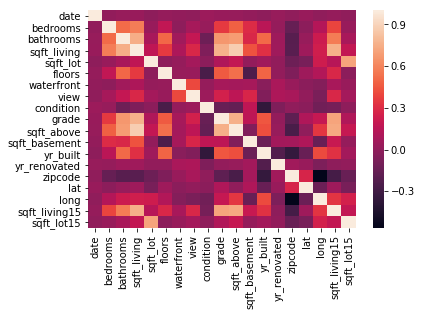

In [10]:
sns.heatmap(data.corr())

Now let's split our data into train and test, this step is important so that we can evaluate the model performance. It's easy concept to understand, we split the data and the y into 2 chunks...

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state =0)

In [12]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
y_predict = model2.predict(X_test)

In [14]:
from sklearn.metrics import r2_score

r2_score(y_test, y_predict)

0.6963471528724865

In [15]:
#We can also call the score function of the model

model2.score(X_test, y_test)

0.6963471528724865

This is how Linear Regression works. how did we perform?.. not very well 69% is not that great. Let's look at a way to improve our model

read more at this link https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/


In [ ]:
from sklearn import ensemble

clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split =2, learning_rate = 0.1, loss='ls')

In [17]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=400,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [18]:
clf.score(X_test, y_test)

0.9047094025353275

<strong>This is much better!</strong>